# Tratamento de Dados 3

## Percentual de mortes de pessoas negras em relação ao número total de mortes em acidente de transporte nos municípios brasileiros. Seguindo critério adotado pelo IBGE, foram consideradas negras, a soma das pessoas pretas e pardas.
Arquivo: [proporcao_mortes_negras_acidente_transporte](https://basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=proporcao_mortes_negras_acidente_transporte)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [38]:
dataset = pd.read_csv("../datasets/proporcao_mortes_negras_acidente_transporte.csv")

In [39]:
dataset.head()

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
0,2000,RO,1100015,Total,50.000000
1,2000,RO,1100023,Total,42.857143
2,2000,RO,1100031,Total,0.000000
3,2000,RO,1100049,Total,73.333333
4,2000,RO,1100056,Total,50.000000


#### Observação
O dataset possui 3.240 linhas com o campo *id_municipio* vazio, então achei que seria melhor excluirmos essas linhas a fim de manter os dados mais consistentes.

In [40]:
# Linhas com id_municipio vazio
dataset[dataset["id_municipio"] == " "]

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
258,2000,PA,,Total,100.000000
976,2000,CE,,Total,83.333333
1086,2000,RN,,Total,0.000000
1165,2000,RN,,Total,100.000000
1396,2000,PB,,Total,0.000000
...,...,...,...,...,...
667773,2019,RS,,Outros,0.000000
667914,2019,RS,,Outros,0.000000
667927,2019,RS,,Outros,0.000000
668105,2019,MT,,Outros,0.000000


In [41]:
dataset = dataset[dataset["id_municipio"] != " "]

### Informações sobre a Tabela

In [42]:
indicadores = dataset["indicador"].unique()
indicadores

array(['Total', 'Pedestres', 'Ciclistas', 'Motociclistas',
       'Ocupantes de automóvel', 'Outros'], dtype=object)

In [43]:
estados = dataset["sigla_uf"].unique()
estados

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

#### Observação
O dataset atual trata da morte de ciclistas, motoristas, pedestres, etc. Porém, para essa análise, somente as proporções totais serão usadas. Para isso, excluirei as linhas que tratam de outros tipos de acidentes.

In [44]:
dataset = dataset[dataset["indicador"] == "Total"]

In [51]:
dataset = dataset.drop(["indicador"], axis=1)

In [52]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}

In [53]:
periodo = range(2000, 2020)

### Analisando a média da porcentagem de mortes totais por região

In [55]:
def get_media_prop_by_regiao(regiao, ano):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: média do percentual de pessoas próximas a redes de transporte
    """
    media = dataset[(dataset["ano"] == ano) &
                    (dataset["sigla_uf"].isin(regioes[regiao]))]["prop_mortes_negras_acidente_transporte"].mean()
    return media

In [54]:
medias_regiao = [get_media_prop_by_regiao(regiao, ano) 
                 for ano in periodo
                 for regiao in regioes]

df1 = pd.DataFrame(np.array(medias_regiao).reshape(20, 5),
                   index=periodo, columns=regioes)
df1.index.name, df1.columns.name = "ano", "regiões"
df1

regiões,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2000,29.560408,30.349222,12.580914,25.041536,6.709749
2001,31.352602,31.594545,12.548748,25.637168,4.946367
2002,33.834800,36.357453,15.910428,27.192868,5.703911
2003,37.652775,35.849409,16.677576,30.695071,4.760621
2004,41.109654,39.130150,18.472241,33.262062,6.542713
2005,42.100618,42.930704,18.718518,34.763734,5.509339
2006,42.011893,45.786810,18.933193,34.678147,5.344307
2007,47.416009,49.132648,19.743834,33.692464,5.686003
2008,48.965923,51.039311,22.187816,38.098961,5.617049


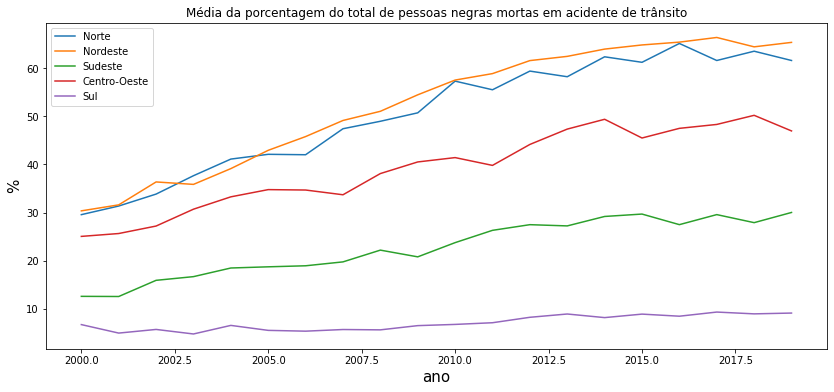

In [56]:
plt.figure(figsize=(14,6))
plt.plot(df1)
plt.title("Média da porcentagem do total de pessoas negras mortas em acidente de trânsito")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos notar que houve aumento no porcentagem de mortes de pessoas negras no trânsito em todas as regiões. Todas as regiões, exceto a Sul, praticamente dobraram suas porcentagens de 2000 para 2019. A região Sul foi a que teve o menor aumento, variando de 6% em 2000 para 9% ao fim de 2019.

### Analisando a variação da porporção de mortes entre os municípios nas regiões

In [68]:
df_prop_2000 = dataset[dataset["ano"] == 2000]
df_prop_2000

,ano,sigla_uf,id_municipio,prop_mortes_negras_acidente_transporte
0,2000,RO,1100015,50.000000
1,2000,RO,1100023,42.857143
2,2000,RO,1100031,0.000000
3,2000,RO,1100049,73.333333
4,2000,RO,1100056,50.000000
...,...,...,...,...
5565,2000,PA,1504752,0.000000
5566,2000,SC,4212650,0.000000
5567,2000,SC,4220000,0.000000
5568,2000,RS,4314548,0.000000


In [70]:
df_prop_2019 = dataset[dataset["ano"] == 2019]
df_prop_2019

,ano,sigla_uf,id_municipio,prop_mortes_negras_acidente_transporte
634980,2019,RO,1100015,60.000000
634981,2019,RO,1100023,84.615385
634982,2019,RO,1100031,100.000000
634983,2019,RO,1100049,64.179104
634984,2019,RO,1100056,50.000000
...,...,...,...,...
640545,2019,PA,1504752,100.000000
640546,2019,SC,4212650,0.000000
640547,2019,SC,4220000,0.000000
640548,2019,RS,4314548,0.000000


In [71]:
len(df_prop_2019) == len(df_prop_2000)

True

In [72]:
tamanho = len(df_prop_2019)

In [73]:
df_prop_2000.index = range(tamanho)
df_prop_2019.index = range(tamanho)

In [75]:
coluna_dif_prop = df_prop_2019["prop_mortes_negras_acidente_transporte"] - df_prop_2000["prop_mortes_negras_acidente_transporte"]
coluna_dif_prop

0        10.000000
1        41.758242
2       100.000000
3        -9.154229
4         0.000000
           ...    
5538    100.000000
5539      0.000000
5540      0.000000
5541      0.000000
5542     33.333333
Name: prop_mortes_negras_acidente_transporte, Length: 5543, dtype: float64

In [78]:
df_dif_prop = dataset[dataset["ano"] == 2000][["sigla_uf", "id_municipio"]]
df_dif_prop.index = range(tamanho)
df_dif_prop["diferenca"] = coluna_dif_prop
df_dif_prop

,sigla_uf,id_municipio,diferenca
0,RO,1100015,10.000000
1,RO,1100023,41.758242
2,RO,1100031,100.000000
3,RO,1100049,-9.154229
4,RO,1100056,0.000000
...,...,...,...
5538,PA,1504752,100.000000
5539,SC,4212650,0.000000
5540,SC,4220000,0.000000
5541,RS,4314548,0.000000


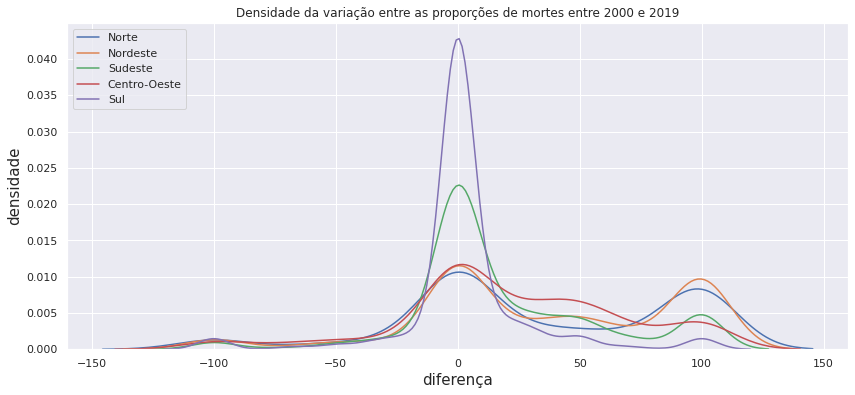

In [88]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = df_dif_prop[df_dif_prop["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação entre as proporções de mortes entre 2000 e 2019")
plt.xlabel("diferença", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos ver que a região Sul foi a que manteve a maior parte de seus municípios sem uma mudança significativa das mortes. A região Sudeste também apresenta pouca mudança em boa parte dos seus municípios, porém já apresenta um certo grau de desigualdade, visto que existem outros muitos municípios com aumentos significativos na proporção de negros mortos em acidentes no transporte. Por fim, é perceptível que as regiões Norte, Nordeste e Centro-Oeste apresentam uma desigualdade acentuada no aumento de proporção, com boa parte de seus municípios tendo aumento de 50% a 100%, enquanto outros não apresentam mudanças significativas.

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2000

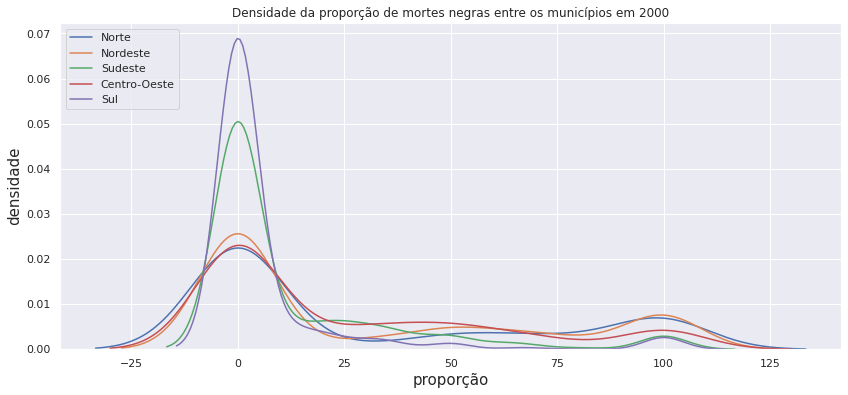

In [91]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2000[df_prop_2000["sigla_uf"].isin(regioes[regiao])]["prop_mortes_negras_acidente_transporte"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2000")
plt.xlabel("proporção", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2019

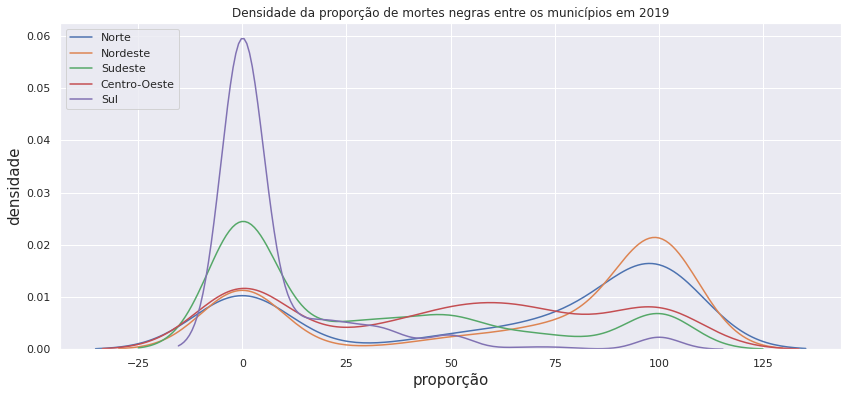

In [92]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2019[df_prop_2019["sigla_uf"].isin(regioes[regiao])]["prop_mortes_negras_acidente_transporte"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2019")
plt.xlabel("proporção", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
A partir do primeiro gráfico, podemos observar que a maioria dos municípios apresentavam uma proporção baixa de mortes negras. Entretanto, já é possível perceber que as regiões Norte, Nordeste e Centro-Oeste já se distoam bastante da Sudeste e Sul, apresentando muitos municípios com proporções acima de 50%.<br>
No segundo gráfico, é possível perceber que a região Sul se manteve próxima da sua situação anterior, enquanto todas as outras regiões apresentaram um aumento na maioria dos seus municípios de mortes negras. Os casos de maior aumento talvez sejam das regiões Norte e Nordeste, onde o número de municípios com proporção próximo de 100% aumentou enormemente.